In [1]:
import numpy as np
import matplotlib.pyplot as plt
'''
plt.rcParams.update({
    "text.usetex": True,             # Use LaTeX for all text rendering
    "font.family": "serif",          # Use a serif font like Computer Modern
    "font.serif": ["Computer Modern"],
    "font.size": 10,                 # General font size (matches LaTeX \normalsize for 11pt)
    "axes.labelsize": 9,            # Font size for axis labels
    "axes.titlesize": 10,            # Font size for plot titles
    "legend.fontsize": 7,            # Font size for legends
    "xtick.labelsize": 7,            # Font size for x-tick labels
    "ytick.labelsize": 7,            # Font size for y-tick labels
    "axes.linewidth": 1,             # Line width for axes
    "lines.linewidth": 1,            # Line width for plot lines
    "patch.linewidth": 1,           # Line width for patches
    "figure.titlesize": 10
})
'''


'\nplt.rcParams.update({\n    "text.usetex": True,             # Use LaTeX for all text rendering\n    "font.family": "serif",          # Use a serif font like Computer Modern\n    "font.serif": ["Computer Modern"],\n    "font.size": 10,                 # General font size (matches LaTeX \normalsize for 11pt)\n    "axes.labelsize": 9,            # Font size for axis labels\n    "axes.titlesize": 10,            # Font size for plot titles\n    "legend.fontsize": 7,            # Font size for legends\n    "xtick.labelsize": 7,            # Font size for x-tick labels\n    "ytick.labelsize": 7,            # Font size for y-tick labels\n    "axes.linewidth": 1,             # Line width for axes\n    "lines.linewidth": 1,            # Line width for plot lines\n    "patch.linewidth": 1,           # Line width for patches\n    "figure.titlesize": 10\n})\n'

In [2]:
plt.rcParams.update({
    "text.usetex": True,             # Use LaTeX for all text rendering
    "font.family": "serif",          # Use a serif font like Computer Modern
    "font.serif": ["Computer Modern"],
    "font.size": 10,                 # General font size (matches LaTeX \normalsize for 11pt)
    "axes.labelsize": 10,            # Font size for axis labels
    "axes.titlesize": 10,            # Font size for plot titles
    "legend.fontsize": 7,            # Font size for legends
    "xtick.labelsize": 7,            # Font size for x-tick labels
    "ytick.labelsize": 7,            # Font size for y-tick labels
    "axes.linewidth": 1,             # Line width for axes
    "lines.linewidth": 1,            # Line width for plot lines
    "patch.linewidth": 1,           # Line width for patches
    "figure.titlesize": 10
})

In [3]:
# scalings
L=1e5;g=9.81; m = 80; P_peloton_hat = 200 # Watts
rho = 1.225; A= 0.36;C_d_avg = 0.7
v_hat_peloton = (2*P_peloton_hat/(C_d_avg*rho*A))**(1/3)
print(v_hat_peloton*3.6) #kph
gravity_term = m*g*v_hat_peloton/P_peloton_hat
print(gravity_term)
acceleration_term = m*v_hat_peloton**3/L/P_peloton_hat
print(acceleration_term)
peloton_time = L/v_hat_peloton
print(peloton_time/3600) # hours
energy_scale = P_peloton_hat*peloton_time
print(energy_scale/4184)#kcal
omega = 0.5
lambda_ = 0.25
N_0 = 5
zeta_0_hat = N_0*4
zeta_0 = zeta_0_hat/L
print(zeta_0)
P_lurking = (0.05 + (1-0.05)*np.exp(-lambda_*zeta_0*L/4))/0.7
P_attack = 3.6249
print(P_lurking)
C_d_single=1/0.7
print(C_d_single)
#plt.plot(np.linspace(0,1,100), theta(np.linspace(0,1,100)))
def C_d(zeta):
    if zeta > 0:
        return (0.05 + (1-0.05)*np.exp(-zeta*L/4*lambda_))/0.7 # you are inside the peloton
    elif zeta > 0.001:
        return 1/0.7 # you have fallen behind the peloton and you are by yourself
    else:
        return 1/0.7 # you are ahead of the peloton
C_d_lurking = C_d(zeta_0)
C_d_lurking
prob_crash = 2
N = 75
prob_crash/N

39.247345458971374
42.77960655027881
0.005183025591188855
2.5479430221475385
438.46055830454776
0.0002
0.46025651002454365
1.4285714285714286


0.02666666666666667

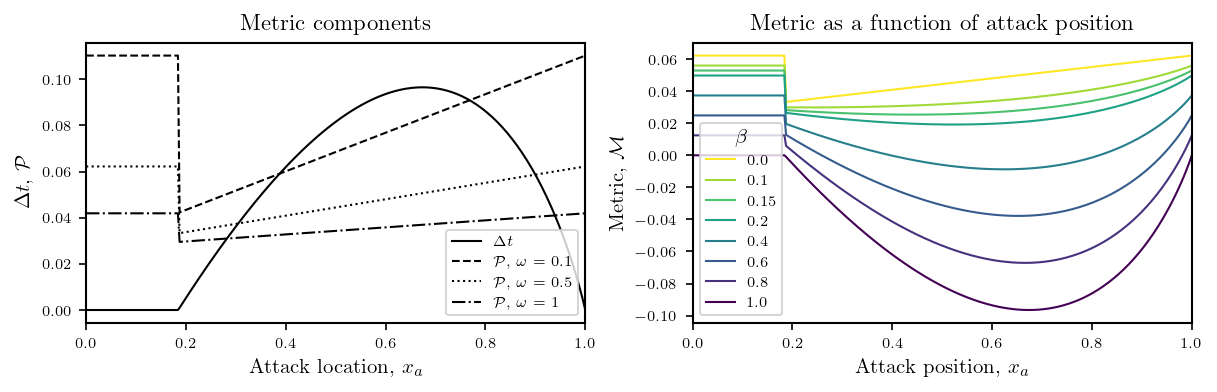

In [8]:
E_ast = 1.25
beta_list = np.array([0,0.1,0.15, 0.2, 0.4, 0.6, 0.8, 1])
cmap = plt.cm.viridis_r; colors = cmap(np.linspace(0, 1, len(beta_list))) 
x_attack_vec = np.linspace(0,1,300)
DeltaT_terms_of_xa_original = 1-x_attack_vec-(1-x_attack_vec)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*x_attack_vec)**(1/2)
DeltaT_terms_of_xa = np.where(DeltaT_terms_of_xa_original>0, DeltaT_terms_of_xa_original, 0)
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8,2.5), dpi=150)
ax[0].plot(x_attack_vec, DeltaT_terms_of_xa,color='black',label=r'$\Delta t$')
omega=0.1
prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega))+1-x_attack_vec)
prob_crash_terms_of_xa = prob_crash/N*x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega))
prob_crash_terms_of_xa += prob_crash/N*(1-x_attack_vec)*np.where(DeltaT_terms_of_xa_original>0, 1, 0)
prob_crash_terms_of_xa += prob_crash/N*(1-x_attack_vec)*(1-np.exp(-omega*N_0))/(1-np.exp(-omega))*np.where(DeltaT_terms_of_xa_original<0, 1, 0)

ax[0].plot(x_attack_vec, prob_crash_terms_of_xa,linestyle='dashed',color='black',label=r'$\mathcal{P}$, '+f'$\omega$ = {omega}')

omega=0.5
prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))
prob_crash_terms_of_xa += prob_crash/N*(1-x_attack_vec)*np.where(DeltaT_terms_of_xa_original>0, 1, 0)
prob_crash_terms_of_xa += prob_crash/N*((1-x_attack_vec)*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))*np.where(DeltaT_terms_of_xa_original<0, 1, 0)
ax[0].plot(x_attack_vec, prob_crash_terms_of_xa,linestyle='dotted',color='black',label=r'$\mathcal{P}$, '+f'$\omega$ = {omega}')

omega=1
prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))
prob_crash_terms_of_xa += prob_crash/N*(1-x_attack_vec)*np.where(DeltaT_terms_of_xa_original>0, 1, 0)
prob_crash_terms_of_xa += prob_crash/N*((1-x_attack_vec)*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))*np.where(DeltaT_terms_of_xa_original<0, 1, 0)
ax[0].plot(x_attack_vec, prob_crash_terms_of_xa,linestyle='dashdot',color='black',label=r'$\mathcal{P}$, '+f'$\omega$ = {omega}')


omega=0.5
prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))
prob_crash_terms_of_xa += prob_crash/N*(1-x_attack_vec)*np.where(DeltaT_terms_of_xa_original>0, 1, 0)
prob_crash_terms_of_xa += prob_crash/N*((1-x_attack_vec)*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))*np.where(DeltaT_terms_of_xa_original<0, 1, 0)
omega = 0.5
#ax[0].plot(x_attack_vec, prob_crash_terms_of_xa,linestyle='dotted',color='black',label=r'$\mathcal{P}$, '+f'$\omega$ = {omega}')
ax[0].set_title('Metric components',fontsize=11)
ax[0].set_ylabel('$\Delta t$, $\mathcal{P}$')
ax[0].set_xlabel('Attack location, $x_a$')
ax[0].set_xlim([0,1])
ax[0].legend()
for j,beta in enumerate(beta_list):
    metric = -beta*DeltaT_terms_of_xa + (1-beta)*prob_crash_terms_of_xa
    plt.plot(x_attack_vec, metric, color = colors[j],label=beta)
ax[1].legend(loc="lower left", title=r'$\beta$',fontsize=7)
ax[1].set_title('Metric as a function of attack position',fontsize=11)
ax[1].set_xlabel('Attack position, $x_a$')
ax[1].set_ylabel('Metric, $\mathcal{M}$')
ax[1].set_xlim([0,1])
plt.savefig('figures_prob_correct/metric_example.pdf')
plt.show()

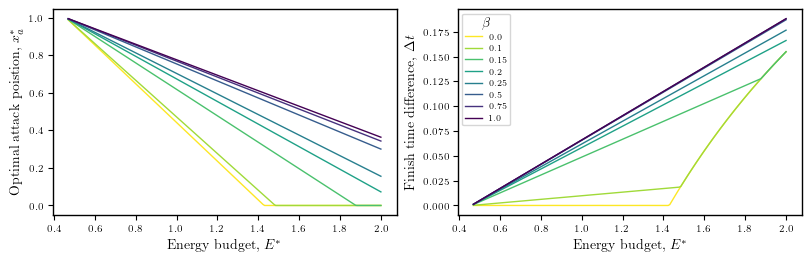

In [14]:
# first as a function of Energy
omega=0.5
E_ast_list = np.linspace(C_d_lurking + 1E-2, 2,200)

beta_list = np.array([0,0.1,0.15,0.2,0.25,0.5,0.75,1])

x_attack_vec = np.linspace(1E-7,1,10000)

cmap = plt.cm.viridis_r  
colors = cmap(np.linspace(0, 1, len(beta_list))) 
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,2.5),constrained_layout=True,dpi=100)
for j,beta in enumerate(beta_list):
    optimal_x_attack = np.zeros_like(E_ast_list)
    time_gap = np.zeros_like(E_ast_list)
    optimal_attack_power = np.zeros_like(E_ast_list)
    for k, E_ast  in enumerate(E_ast_list):
        DeltaT_terms_of_xa_original = 1-x_attack_vec-(1-x_attack_vec)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*x_attack_vec)**(1/2)
        DeltaT_terms_of_xa = np.where(DeltaT_terms_of_xa_original>0, DeltaT_terms_of_xa_original, 0)
        prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega))+1-x_attack_vec)
        prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))
        prob_crash_terms_of_xa += prob_crash/N*(1-x_attack_vec)*np.where(DeltaT_terms_of_xa_original>0, 1, 0)
        prob_crash_terms_of_xa += prob_crash/N*((1-x_attack_vec)*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))*np.where(DeltaT_terms_of_xa_original<0, 1, 0)
        metric = - beta*DeltaT_terms_of_xa + (1-beta)*prob_crash_terms_of_xa
        optimal_x_a = x_attack_vec[np.argmin(metric)]
        optimal_attack_power[k] = ((E_ast-C_d_lurking*optimal_x_a)/(C_d_single**(1/3)*(1-optimal_x_a)))**(3/2)
        optimal_x_attack[k] = optimal_x_a
        time_gap[k] = 1-optimal_x_a-(1-optimal_x_a)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*optimal_x_a)**(1/2)
    ax[0].plot(E_ast_list, optimal_x_attack, label=f"{beta}",color=colors[j])
    ax[1].plot(E_ast_list,np.where(time_gap>0, time_gap,0), color=colors[j], label=f"{beta}" )
    #ax[2].plot(E_ast_list, optimal_attack_power,color=colors[j])
    #ax[2].plot(E_ast_list, E_ast_list**(3/2)/C_d_single**(1/2), '--',color='grey', linewidth =0.5)
ax[1].legend(loc="upper left",fontsize=6,title=r"$\beta$")
ax[0].set_xlabel(r'Energy budget, $E^\ast$');ax[1].set_xlabel(r'Energy budget, $E^\ast$')
#ax[2].set_xlabel(r'Energy budget, $E^\ast$')
ax[0].set_ylabel(r'Optimal attack poistion, $x_a^\ast$')
#ax[2].set_ylabel(r'Optimal attack power, $P_a^\ast$')
#ax[2].set_ylim([1., 4.5])
#ax[2].set_xlim([0.5, 2])
#ax[0].set_title('Optimal attack position vs energy budget')

ax[1].set_ylabel('Finish time difference, $\Delta t$')
#ax[1].set_title('$\Delta T$ vs energy')
plt.savefig('figures_prob_correct/optimal_break_position_vs_energy.pdf')


0.8556838407641553
0.7007755592465065
0.44259509005042513
0.18441462085434382
0
0
0


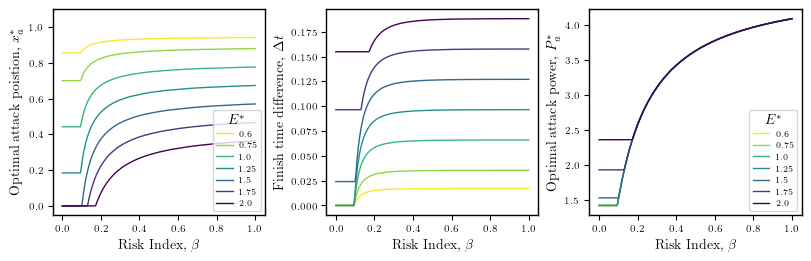

In [15]:
# second as a function of risk
E_ast_list = np.array([0.6, 0.75, 1,1.25, 1.5, 1.75,2])

beta_list = np.linspace(0, 1, 300)


cmap = plt.cm.viridis_r  
colors = cmap(np.linspace(0, 1, len(E_ast_list))) 
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(8,2.5),constrained_layout=True)
for j,E_ast in enumerate(E_ast_list):
    optimal_x_attack = np.zeros_like(beta_list)
    time_gap = np.zeros_like(beta_list)
    x_attack_min = max((C_d_single-E_ast)/(C_d_single-C_d_lurking),0)
    print(x_attack_min)
    x_attack_vec = np.linspace(x_attack_min-1E-4,1,5000)
    optimal_attack_power = np.zeros_like(beta_list)
    for k, beta  in enumerate(beta_list):
        DeltaT_terms_of_xa_original = 1-x_attack_vec-(1-x_attack_vec)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*x_attack_vec)**(1/2)
        DeltaT_terms_of_xa = np.where(DeltaT_terms_of_xa_original>0, DeltaT_terms_of_xa_original, 0)
        prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega))+1-x_attack_vec)
        prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))
        prob_crash_terms_of_xa += prob_crash/N*(1-x_attack_vec)*np.where(DeltaT_terms_of_xa_original>0, 1, 0)
        prob_crash_terms_of_xa += prob_crash/N*((1-x_attack_vec)*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))*np.where(DeltaT_terms_of_xa_original<0, 1, 0)

        metric = -beta*DeltaT_terms_of_xa + (1-beta)*prob_crash_terms_of_xa
        optimal_x_a = x_attack_vec[np.argmin(metric)]
        optimal_attack_power[k] = ((E_ast-C_d_lurking*optimal_x_a)/(C_d_single**(1/3)*(1-optimal_x_a)))**(3/2)
        optimal_x_attack[k] = optimal_x_a
        time_gap[k] = 1-optimal_x_a-(1-optimal_x_a)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*optimal_x_a)**(1/2)
    ax[0].plot(beta_list, optimal_x_attack, label=f"{E_ast}",color=colors[j])
    ax[1].plot(beta_list,np.where(time_gap>0, time_gap,0), color=colors[j], label=f"{E_ast}" )
    ax[2].plot(beta_list, optimal_attack_power, label=f"{E_ast}",color=colors[j],)
ax[0].legend(loc="lower right",fontsize=6,title=r"$E^\ast$")
ax[0].set_ylim([-0.05,1.1])
ax[0].set_ylabel(r'Optimal attack poistion, $x_a^\ast$')
ax[0].set_xlabel(r'Risk Index, $\beta$')
#ax[0].set_title('Optimal attack position vs risk index')

ax[1].set_ylabel('Finish time difference, $\Delta t$')
ax[1].set_xlabel(r'Risk Index, $\beta$')
#ax[1].set_title('$\Delta T$ vs risk index')
ax[2].legend(loc="lower right",fontsize=6,title=r"$E^\ast$")
ax[2].set_xlabel(r'Risk Index, $\beta$')
ax[2].set_ylabel(r'Optimal attack power, $P_a^\ast$')
plt.savefig('figures_prob_correct/optimal_vs_risk_index.pdf')
plt.show()

0.09492057429164921


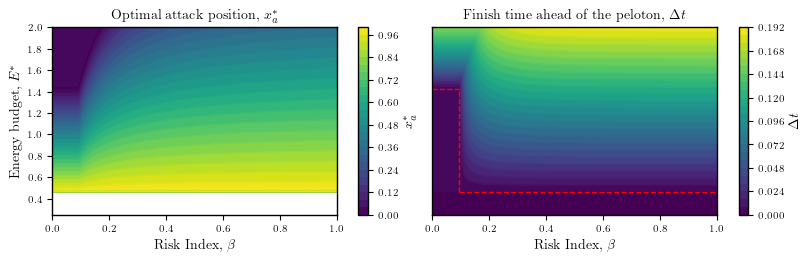

In [13]:
# as a function of both
E_ast_list = E_ast_list = np.linspace(C_d_lurking + 1E-6, 2,200)

beta_list = np.linspace(0, 1, 300)

x_attack_vec = np.linspace(0,1,1000)

cmap = plt.cm.viridis_r  
colors = cmap(np.linspace(0, 1, len(E_ast_list))) 

optimal_x_attack = np.zeros((len(beta_list), len(E_ast_list)))
time_gap = np.zeros((len(beta_list), len(E_ast_list)))
for j,E_ast in enumerate(E_ast_list):
    for k, beta  in enumerate(beta_list):
        DeltaT_terms_of_xa_original = 1-x_attack_vec-(1-x_attack_vec)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*x_attack_vec)**(1/2)
        DeltaT_terms_of_xa = np.where(DeltaT_terms_of_xa_original>0, DeltaT_terms_of_xa_original, 0)
        prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega))+1-x_attack_vec)
        prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))
        prob_crash_terms_of_xa += prob_crash/N*(1-x_attack_vec)*np.where(DeltaT_terms_of_xa_original>0, 1, 0)
        prob_crash_terms_of_xa += prob_crash/N*((1-x_attack_vec)*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))*np.where(DeltaT_terms_of_xa_original<0, 1, 0)
        metric = -beta*DeltaT_terms_of_xa + (1-beta)*prob_crash_terms_of_xa
        optimal_x_a = x_attack_vec[np.argmin(metric)]
        optimal_x_attack[k,j] = optimal_x_a
        
        time_gap[k,j] = 1-optimal_x_a-(1-optimal_x_a)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*optimal_x_a)**(1/2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 2.5), constrained_layout=True)
contour1 = ax[0].contourf(beta_list, E_ast_list, optimal_x_attack.T, levels=30)
contour2 = ax[1].contourf(beta_list, E_ast_list, np.where(time_gap > 0, time_gap, 0).T, levels=30)
ax[0].contour(beta_list, E_ast_list, optimal_x_attack.T, levels=30)
ax[1].contour(beta_list, E_ast_list, np.where(time_gap > 0, time_gap, 0).T, levels=30)

# Add colorbars
fig.colorbar(contour1, ax=ax[0], label=r'$x_a^\ast$')
fig.colorbar(contour2, ax=ax[1], label='$\Delta t$')

ax[0].set_xlabel(r'Risk Index, $\beta$')
ax[0].set_ylabel(r'Energy budget, $E^\ast$')
ax[0].set_title(r'Optimal attack position, $x_a^\ast$')
ax[1].set_yticks([])
ax[1].set_xlabel(r'Risk Index, $\beta$')
ax[1].set_title('Finish time ahead of the peloton, $\Delta t$')
ax[1].contourf([0,1],[0,C_d_lurking],[[0,0],[0,0]], levels=2,vmax=1,vmin=0)
critical_risk = prob_crash/N*((1-np.exp(-omega*N_0))/(1-np.exp(-omega))-1)/(prob_crash/N*((1-np.exp(-omega*N_0))/(1-np.exp(-omega))-1)+1/2*(1-C_d_lurking/C_d_single))
print(critical_risk)
ax[1].plot([critical_risk,critical_risk], [C_d_lurking, C_d_single], color='red', linestyle='--')
ax[1].plot([0,critical_risk],[C_d_single, C_d_single], color='red', linestyle='--')
ax[1].plot([critical_risk,1],[C_d_lurking, C_d_lurking], color='red', linestyle='--')
ax[0].set_ylim([0.25,2]);ax[1].set_ylim([0.25,2])

plt.savefig('figures_prob_correct/optimals_vs_energy_and_risk.pdf')
plt.show()

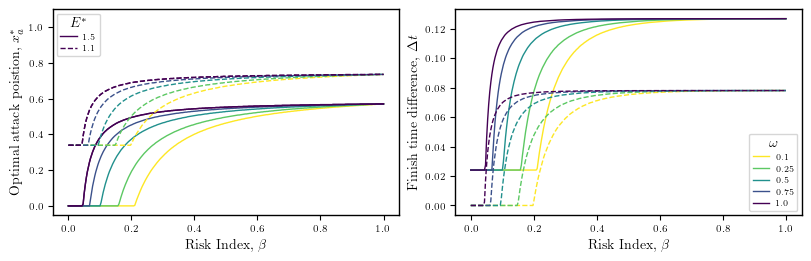

In [18]:
# omega_sweep

omega_list = np.flip(np.array([1, 0.75,0.5,0.25,0.1]))

beta_list = np.linspace(0, 1, 300)


x_attack_vec = np.linspace(0,1,1000)
E_ast = 1.5
cmap = plt.cm.viridis_r  
colors = cmap(np.linspace(0, 1, len(omega_list))) 

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,2.5),constrained_layout=True)

for j,omega in enumerate(omega_list):
    optimal_x_attack = np.zeros_like(beta_list)
    time_gap = np.zeros_like(beta_list)
    optimal_attack_power = np.zeros_like(beta_list)
    for k, beta  in enumerate(beta_list):
        DeltaT_terms_of_xa = 1-x_attack_vec-(1-x_attack_vec)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*x_attack_vec)**(1/2)
        DeltaT_terms_of_xa = np.where(DeltaT_terms_of_xa>0, DeltaT_terms_of_xa, 0)
        prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega))+1-x_attack_vec)
        metric = -beta*DeltaT_terms_of_xa + (1-beta)*prob_crash_terms_of_xa
        optimal_x_a = x_attack_vec[np.argmin(metric)]
        optimal_x_attack[k] = optimal_x_a
        time_gap[k] = 1-optimal_x_a-(1-optimal_x_a)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*optimal_x_a)**(1/2)
        optimal_attack_power[k] = ((E_ast-C_d_lurking*optimal_x_a)/(C_d_single**(1/3)*(1-optimal_x_a)))**(3/2)
        
    ax[0].plot(beta_list, optimal_x_attack,color=colors[j])
    ax[1].plot(beta_list,np.where(time_gap>0, time_gap,0), color=colors[j], label=f"{omega}" )
    #ax[2].plot(beta_list, optimal_attack_power,color=colors[j], label=f"{omega}" )
ax[0].plot(beta_list, optimal_x_attack, label=f"{E_ast}",color=colors[j])
E_ast = 1.1
for j,omega in enumerate(omega_list):
    optimal_x_attack = np.zeros_like(beta_list)
    time_gap = np.zeros_like(beta_list)
    optimal_attack_power = np.zeros_like(beta_list)
    for k, beta  in enumerate(beta_list):
        DeltaT_terms_of_xa_original = 1-x_attack_vec-(1-x_attack_vec)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*x_attack_vec)**(1/2)
        DeltaT_terms_of_xa = np.where(DeltaT_terms_of_xa_original>0, DeltaT_terms_of_xa_original, 0)
        prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega))+1-x_attack_vec)
        prob_crash_terms_of_xa = prob_crash/N*(x_attack_vec*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))
        prob_crash_terms_of_xa += prob_crash/N*(1-x_attack_vec)*np.where(DeltaT_terms_of_xa_original>0, 1, 0)
        prob_crash_terms_of_xa += prob_crash/N*((1-x_attack_vec)*(1-np.exp(-omega*N_0))/(1-np.exp(-omega)))*np.where(DeltaT_terms_of_xa_original<0, 1, 0)

        metric = -beta*DeltaT_terms_of_xa + (1-beta)*prob_crash_terms_of_xa
        optimal_x_a = x_attack_vec[np.argmin(metric)]
        optimal_x_attack[k] = optimal_x_a
        optimal_attack_power[k] = ((E_ast-C_d_lurking*optimal_x_a)/(C_d_single**(1/3)*(1-optimal_x_a)))**(3/2)
        time_gap[k] = 1-optimal_x_a-(1-optimal_x_a)**(3/2)*C_d_single**(1/2)/(E_ast-C_d_lurking*optimal_x_a)**(1/2)
    ax[0].plot(beta_list, optimal_x_attack,'--',color=colors[j])
    ax[1].plot(beta_list,np.where(time_gap>0, time_gap,0),'--', color=colors[j])
    #ax[2].plot(beta_list, optimal_attack_power,'--',color=colors[j])
ax[0].plot(beta_list, optimal_x_attack, '--',label=f"{E_ast}",color=colors[j])
ax[0].legend(loc="upper left",fontsize=6,title=r"$E^\ast$")
ax[1].legend(loc="lower right",fontsize=6,title=r"$\omega$")
ax[0].set_ylim([-0.05,1.1])
ax[0].set_ylabel(r'Optimal attack poistion, $x_a^\ast$')
ax[0].set_xlabel(r'Risk Index, $\beta$')
#ax[0].set_title('Optimal attack position vs risk index')

ax[1].set_ylabel('Finish time difference, $\Delta t$')
ax[1].set_xlabel(r'Risk Index, $\beta$')

#ax[2].legend(loc="lower right",fontsize=6,title=r"$\omega$")
#ax[2].set_ylabel(r'Optimal attack power, $P_a^\ast$')
#ax[2].set_xlabel(r'Risk Index, $\beta$')
#ax[1].set_title('$\Delta T$ vs risk index')
plt.savefig('figures_prob_correct/optimal_vs_risk_index_omega_sweep.pdf')
plt.show()

In [129]:
N_0=5
omega = 0.5
H=(1-np.exp(-omega*N_0))/(1-np.exp(-omega))
E_ast = 1.25
x_min = (C_d_single-E_ast)/(C_d_single-C_d_lurking)
eta_min = np.sqrt((1-x_min)/(E_ast-C_d_lurking*x_min))
eta_min = 1/np.sqrt(C_d_single)
beta = (1-H*prob_crash/N)/((H-1)*prob_crash/N-1+3/2*eta_min-C_d_single**(1/2)*C_d_lurking/2*eta_min**3)
beta = (1-H*prob_crash/N)/(1+C_d_single**(1/2)/2*(C_d_lurking*eta_min**3-3*eta_min)+prob_crash/N*(1-H))
beta = (1-H)*prob_crash/N/(prob_crash/N*(1 - H) + 1/2*(C_d_lurking/C_d_single-1))
beta

0.0949205742916492

In [126]:
C_d_single
C_d_lurking

0.46025651002454365

In [149]:
N_A = 6.022e23
M_DMDS = 94.1/N_A
mu_air = 1e-5
rho_DMDS = 1.06
rho_DMDS_m =rho_DMDS*100**3
V_DMDS = M_DMDS/rho_DMDS
print(V_DMDS)
print(rho_DMDS_m)

V_DMDS_m = M_DMDS/rho_DMDS_m
print(V_DMDS_m)
R_DMDS_cm = (3*V_DMDS/(4*np.pi))**(1/3)
R_DMDS_m = R_DMDS_cm/100
R_DMDS_m
k_boltzmann = 1.380649e-23
T = 298
Length = 10
V_DMDS_m*rho_DMDS_m*g*Length/k_boltzmann/T
M_DMDS*g*Length/k_boltzmann/T
u = V_DMDS_m*rho_DMDS_m*g/(6*np.pi*R_DMDS_m*mu_air)
print(u)
D = k_boltzmann*T/(6*np.pi*R_DMDS_m*mu_air)
kappa = 1e-2
print(D)
print(u*Length/D)
print(u*Length/kappa)

1.4741545152052535e-22
1060000.0
1.4741545152052535e-28
2.4816010105687148e-08
6.660604162537321e-08
3.7257896581311964
2.481601010568715e-05
